# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

#create blank lists for data
returned_city=[]          
lat=[]           
lng=[]          
max_temp=[]      
humidity=[]     
cloudiness=[]    
wind_speed=[]    
country=[]       
date=[]          


# Loop through the list of cities and perform a request for data on each
count=0
missing=0
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json() 
#     print(response)
#     if (count>10): break
    try:
        
        returned_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1
        print(f'Processing Recored {count} of {len(cities)} | {city}') 
    except:
        missing+=1
        print(f'City not found. Skipping, total not found = {missing}')

    time.sleep(3)
      

Processing Recored 1 of 612 | bredasdorp
Processing Recored 2 of 612 | broken hill
Processing Recored 3 of 612 | sao filipe
Processing Recored 4 of 612 | bluff
Processing Recored 5 of 612 | mataura
Processing Recored 6 of 612 | jamestown
Processing Recored 7 of 612 | rikitea
Processing Recored 8 of 612 | busselton
City not found. Skipping, total not found = 1
Processing Recored 9 of 612 | labuhan
Processing Recored 10 of 612 | marawi
Processing Recored 11 of 612 | glace bay
Processing Recored 12 of 612 | totskoye
Processing Recored 13 of 612 | awang
Processing Recored 14 of 612 | cherskiy
Processing Recored 15 of 612 | cap malheureux
Processing Recored 16 of 612 | ushuaia
Processing Recored 17 of 612 | beyneu
Processing Recored 18 of 612 | zhovtneve
Processing Recored 19 of 612 | lompoc
Processing Recored 20 of 612 | nelson bay
City not found. Skipping, total not found = 2
Processing Recored 21 of 612 | clyde river
Processing Recored 22 of 612 | atuona
Processing Recored 23 of 612 | ne

Processing Recored 188 of 612 | nhulunbuy
Processing Recored 189 of 612 | lavumisa
Processing Recored 190 of 612 | loksa
Processing Recored 191 of 612 | san policarpo
Processing Recored 192 of 612 | snyder
Processing Recored 193 of 612 | lavrentiya
Processing Recored 194 of 612 | hasaki
Processing Recored 195 of 612 | egvekinot
Processing Recored 196 of 612 | kiunga
City not found. Skipping, total not found = 14
Processing Recored 197 of 612 | puro
Processing Recored 198 of 612 | khatanga
Processing Recored 199 of 612 | biak
Processing Recored 200 of 612 | esperance
Processing Recored 201 of 612 | aksarka
Processing Recored 202 of 612 | sola
Processing Recored 203 of 612 | sembabule
Processing Recored 204 of 612 | manutuke
Processing Recored 205 of 612 | nouadhibou
Processing Recored 206 of 612 | geraldton
Processing Recored 207 of 612 | atar
Processing Recored 208 of 612 | hithadhoo
Processing Recored 209 of 612 | port macquarie
City not found. Skipping, total not found = 15
City not 

City not found. Skipping, total not found = 41
City not found. Skipping, total not found = 42
Processing Recored 356 of 612 | lannion
Processing Recored 357 of 612 | bonavista
Processing Recored 358 of 612 | berlevag
Processing Recored 359 of 612 | yulara
Processing Recored 360 of 612 | severnoye
Processing Recored 361 of 612 | zitacuaro
Processing Recored 362 of 612 | buluang
Processing Recored 363 of 612 | ippy
City not found. Skipping, total not found = 43
Processing Recored 364 of 612 | maceio
Processing Recored 365 of 612 | merauke
Processing Recored 366 of 612 | manggar
Processing Recored 367 of 612 | lorengau
Processing Recored 368 of 612 | agirish
Processing Recored 369 of 612 | sao jose da coroa grande
Processing Recored 370 of 612 | jiayuguan
Processing Recored 371 of 612 | sabha
Processing Recored 372 of 612 | calvia
City not found. Skipping, total not found = 44
Processing Recored 373 of 612 | chimoio
Processing Recored 374 of 612 | vyazemskiy
City not found. Skipping, tota

Processing Recored 531 of 612 | rawlins
Processing Recored 532 of 612 | astoria
Processing Recored 533 of 612 | alice springs
Processing Recored 534 of 612 | port-cartier
Processing Recored 535 of 612 | chinhoyi
City not found. Skipping, total not found = 62
Processing Recored 536 of 612 | kavaratti
Processing Recored 537 of 612 | umm lajj
Processing Recored 538 of 612 | tabuk
Processing Recored 539 of 612 | henties bay
City not found. Skipping, total not found = 63
Processing Recored 540 of 612 | sistranda
Processing Recored 541 of 612 | edgewater
City not found. Skipping, total not found = 64
Processing Recored 542 of 612 | flinders
Processing Recored 543 of 612 | boali
Processing Recored 544 of 612 | felanitx
Processing Recored 545 of 612 | honiara
Processing Recored 546 of 612 | aberdeen
Processing Recored 547 of 612 | pokhara
Processing Recored 548 of 612 | taywarah


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()
weather_data.to_csv('../output_data/Exported_weather_data.csv')

In [8]:
weather_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Bredasdorp,-34.53,20.04,15.00,54,61,3.60,ZA,1595777264
1,Broken Hill,-31.95,141.43,10.00,64,95,2.60,AU,1595777327
2,São Filipe,14.90,-24.50,25.48,86,100,4.26,CV,1595777331
3,Bluff,-46.60,168.33,3.89,83,25,1.34,NZ,1595777334
4,Mataura,-46.19,168.86,3.89,83,1,1.34,NZ,1595777337


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.568686,24.711204,21.678139,68.118613,51.125912,3.653376,1.595778e+09
std,33.161217,90.600863,7.877888,21.097982,37.185496,2.405174,5.620227e+02
min,-54.800000,-179.170000,0.000000,3.000000,0.000000,0.210000,1.595777e+09
25%,-8.967500,-52.240000,16.000000,57.000000,13.750000,1.787500,1.595778e+09
50%,21.700000,27.395000,22.670000,72.000000,55.000000,3.100000,1.595778e+09
75%,46.522500,104.075000,27.245000,84.000000,90.000000,5.100000,1.595779e+09
max,78.220000,179.320000,45.900000,100.000000,100.000000,12.300000,1.595779e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
print(f'Max humidity is {weather_data["Humidity"].max()}')

Max humidity is 100


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

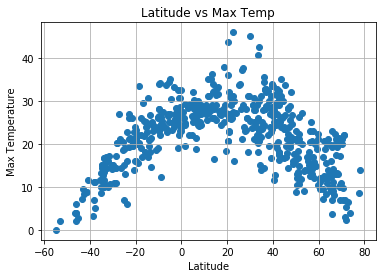

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Max_Temp"])
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.savefig('../output_data/Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

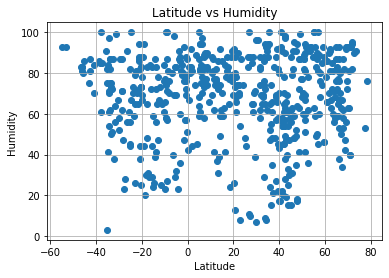

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('../output_data/Lat_vs_Humidity.png')

## Latitude vs. Cloudiness Plot

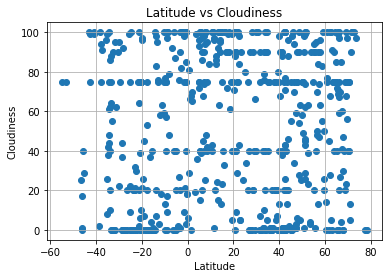

In [15]:
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.savefig('../output_data/Lat_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

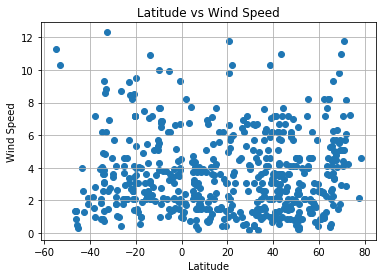

In [16]:
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.scatter(weather_data["Lat"], weather_data["Wind_Speed"])
plt.savefig('../output_data/Lat_vs_Wind_Speed.png')

## Linear Regression

 the rsquared value is 0.4243970596246149


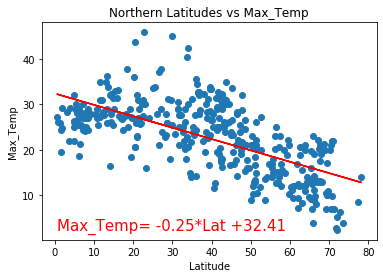

 the rsquared value is 0.0010032203158634706


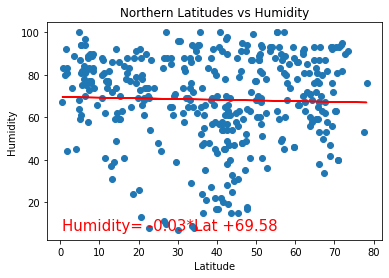

 the rsquared value is 0.008069692561562968


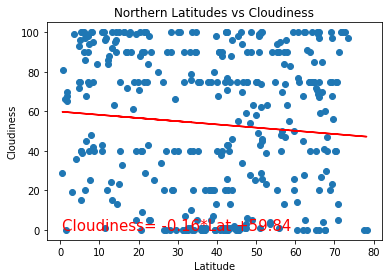

 the rsquared value is 0.021667926621793242


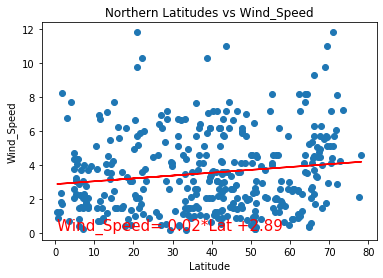

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
north=weather_data.loc[(weather_data['Lat']>=0)]
xvalue=north['Lat']

#for loop here to change yvalue
for each_variable in yvalues:
    
    yvalue=north[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
    plt.title(f'Northern Latitudes vs {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()



 the rsquared value is 0.7100098463760319


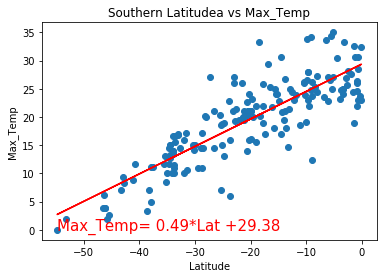

 the rsquared value is 0.020728523728403118


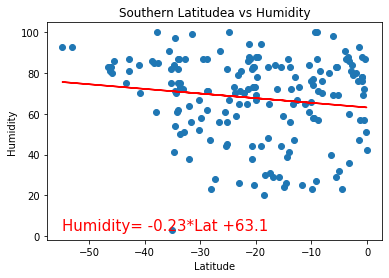

 the rsquared value is 6.384080324604559e-05


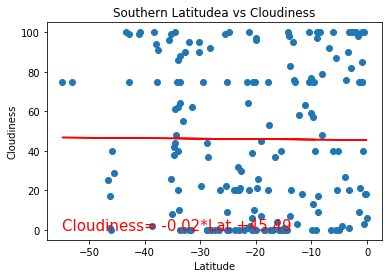

 the rsquared value is 0.0019936991566011216


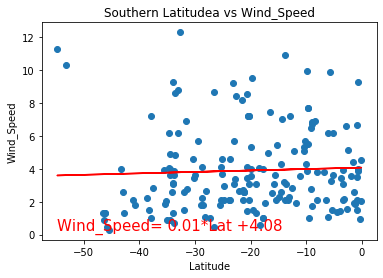

In [18]:
plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
south=weather_data.loc[(weather_data['Lat']<=0)]
xvalue=south['Lat']

#for loop here to change yvalue
for each_variable in yvalues:
    
    yvalue=south[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
    plt.title(f'Southern Latitudea vs {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
north=weather_data.loc[(weather_data['Lat']>=0)]
xvaluen=north['Lat']
south=weather_data.loc[(weather_data['Lat']<0)]
xvalues=south['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 the rsquared value is 0.4243970596246149


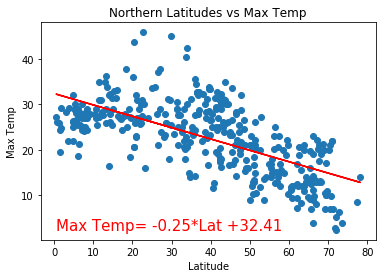

For ever increase in Latitude towards the North Pole the Max Temp drop by a 1/4 of a degree


In [30]:
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvalue=north['Lat']

    
yvalue=north['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Northern Latitudes vs Max Temp')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Northern_Lat_vs_Max_Temp.png')
plt.show()

print('For ever increase in Latitude towards the North Pole the Max Temp drop by a 1/4 of a degree')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 the rsquared value is 0.7100098463760319


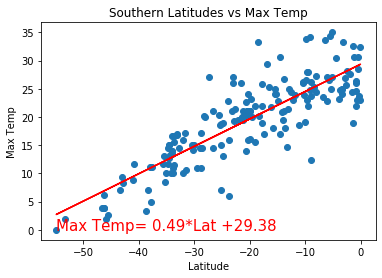

As you move towards the equater the Max Temp increases by almost 1/2 a degree for each Latitude


In [31]:
yvalue=south['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Southern Latitudes vs Max Temp')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Southern_Lat_vs_Max_Temp.png')
plt.show()

print('As you move towards the equater the Max Temp increases by almost 1/2 a degree for each Latitude')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 the rsquared value is 0.0010032203158634706


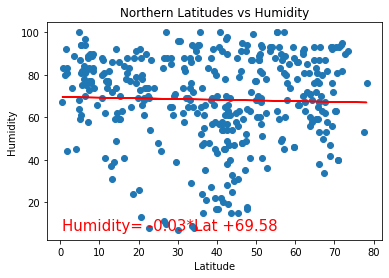

Humidity and Latitude do not have a correlation


In [32]:
yvalue=north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Latitudes vs Humidity')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Northern_Lat_vs_Humidity.png')
plt.show()

print('Humidity and Latitude do not have a correlation')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 the rsquared value is 0.020728523728403118


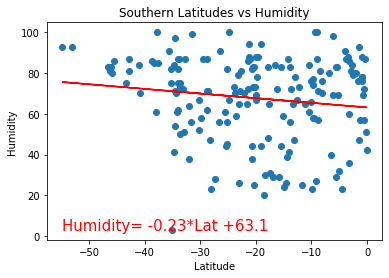

Humidity and Latitude do not have a correlation


In [33]:
yvalue=south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Latitudes vs Humidity')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Southern_Lat_vs_Humidity.png')
plt.show()

print('Humidity and Latitude do not have a correlation')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 the rsquared value is 0.008069692561562968


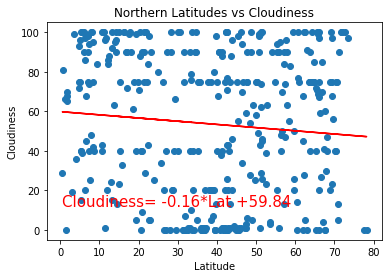

There is a slight decress in Cloudiness as you move North


In [34]:
yvalue=north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Latitudes vs Cloudiness')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Northern_Lat_vs_Cloudiness.png')
plt.show()

print('There is a slight decress in Cloudiness as you move North')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 the rsquared value is 6.384080324604559e-05


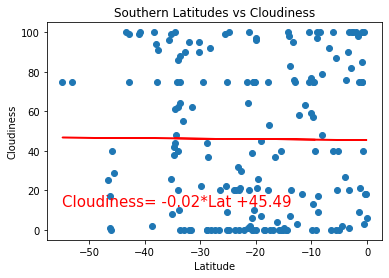

Slight incress in % Cloudiness as you move towards the equator


In [35]:
yvalue=south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Latitudes vs Cloudiness')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Southern_Lat_vs_Cloudiness.png')
plt.show()

print('Slight incress in % Cloudiness as you move towards the equator')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 the rsquared value is 0.021667926621793242


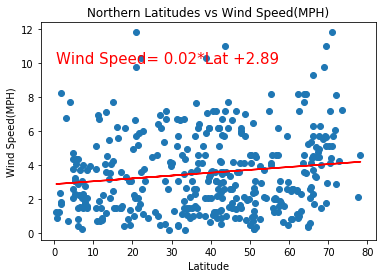

There is very little correlation between Latitude and Wind Speed


In [37]:
yvalue=north['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.title(f'Northern Latitudes vs Wind Speed(MPH)')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Northern_Lat_vs_Wind_Speed.png')
plt.show()

print('There is very little correlation between Latitude and Wind Speed')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 the rsquared value is 0.0019936991566011216


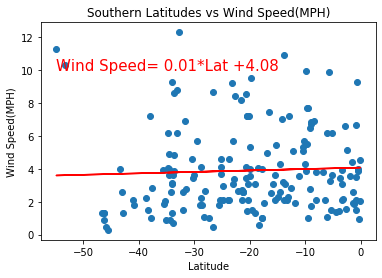

There is very little correlation between Latitude and Wind Speed


In [38]:
yvalue=south['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.title(f'Southern Latitudes vs Wind Speed(MPH)')
print(f" the rsquared value is {rvalue**2}")
plt.savefig('../output_data/Southern_Lat_vs_Wind_Speed.png')
plt.show()

print('There is very little correlation between Latitude and Wind Speed')
